In [1]:

%matplotlib inline

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle
import streamlit as st

In [ ]:

df = pd.read_csv(r'D:\Flask_App\Flask_App\Dataset.csv')

df.head()


,longitude,latitude,NDVI,MaxTemp,AveTemp,MinTemp,AveHumidity,Rainfall,Crop_Type
0,-88.707511,41.815454,0.2518,1.705882,-1.476471,-5.411765,85.888235,1.673529,corn
1,-88.707511,41.815454,0.3869,1.705882,-1.476471,-5.411765,85.888235,1.673529,corn
2,-88.707511,41.815454,0.2607,7.857143,1.678571,-4.142857,77.725000,0.516786,corn
3,-88.707511,41.815454,0.2353,7.857143,1.678571,-4.142857,77.725000,0.516786,corn
4,-88.707511,41.815454,0.2536,6.576923,2.757692,-1.153846,74.657692,1.993077,corn


In [1]:
#give last five rows
df.tail()

NameError: name 'df' is not defined

In [4]:
print(df)

          longitude   latitude    NDVI    MaxTemp    AveTemp    MinTemp  \
0        -88.707511  41.815454  0.2518   1.705882  -1.476471  -5.411765   
1        -88.707511  41.815454  0.3869   1.705882  -1.476471  -5.411765   
2        -88.707511  41.815454  0.2607   7.857143   1.678571  -4.142857   
3        -88.707511  41.815454  0.2353   7.857143   1.678571  -4.142857   
4        -88.707511  41.815454  0.2536   6.576923   2.757692  -1.153846   
...             ...        ...     ...        ...        ...        ...   
1125063 -111.014926  47.373779  0.2333  23.580645  18.361290  13.451613   
1125064 -111.014926  47.373779 -0.0498  18.466667  13.146667   8.500000   
1125065 -111.014926  47.373779  0.2489  18.466667  13.146667   8.500000   
1125066 -111.014926  47.373779  0.2728  12.000000   7.858065   4.225806   
1125067 -111.014926  47.373779 -0.0222  12.000000   7.858065   4.225806   

         AveHumidity  Rainfall Crop_Type  
0          85.888235  1.673529      corn  
1          85

In [5]:
df.isnull().sum()

longitude        0
latitude         0
NDVI           394
MaxTemp          0
AveTemp          0
MinTemp          0
AveHumidity      0
Rainfall         0
Crop_Type        0
dtype: int64

In [7]:
#this is used to fill the null values which is present in NDVI column,
#first we take the median then that median is replace with null values
#if you replace with mode just change median into mode, or change with mean 
df['NDVI'].fillna(df['NDVI'].mean(),inplace=True)

In [8]:
df.isnull().sum()

longitude      0
latitude       0
NDVI           0
MaxTemp        0
AveTemp        0
MinTemp        0
AveHumidity    0
Rainfall       0
Crop_Type      0
dtype: int64

In [45]:
# #data visualization
# sns.relplot(data=df, x='Crop_Type', y='NDVI', col='Rainfall', hue='Min Temp',style='Min Temp' size='Max Temp')

SyntaxError: invalid syntax (95426748.py, line 2)

<AxesSubplot:xlabel='NDVI', ylabel='Rainfall'>

C:\Users\AL Makkah computer\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\AL Makkah computer\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


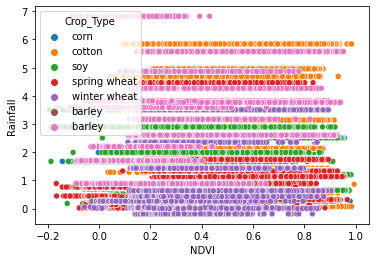

In [112]:
# #graph between two perameters
# sns.scatterplot(x='NDVI' ,y='Rainfall' ,hue='Crop_Type',data=df)

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

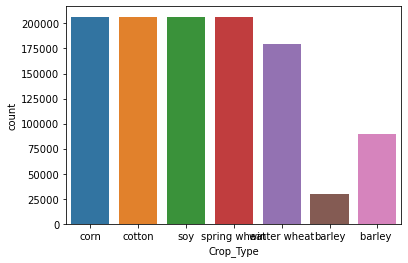

In [9]:
#this is count plot means count the row and display in graph  (ye catogories the dermiyan hota hy not )
sns.countplot(x='Crop_Type',data=df)

C:\Users\AL Makkah computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NDVI', ylabel='Density'>

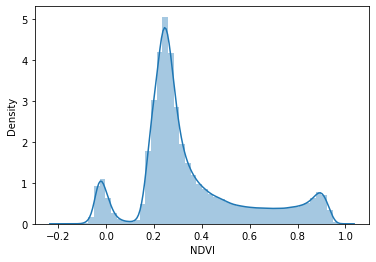

In [79]:
# #Distribution plot
# sns.distplot(df['NDVI'])

In [78]:
#Heat Map
correlation=df.corr()

<AxesSubplot:>

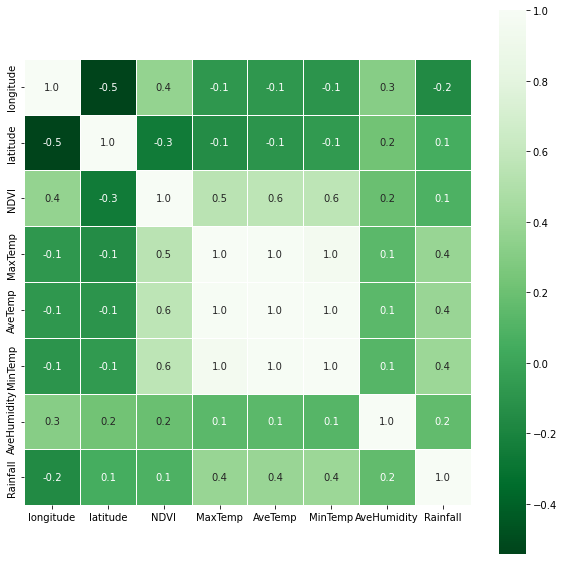

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap='Greens_r', cbar=True, square=True, fmt='.1f' , annot=True, annot_kws={'size':10} ,linewidth=1)

In [10]:
df['Crop_Type'].unique()

array(['corn', 'cotton', 'soy', 'spring wheat', 'winter wheat', 'barley',
       'barley '], dtype=object)

In [11]:
#count the values based on labels
df.value_counts('Crop_Type')

Crop_Type
corn            206609
cotton          206586
soy             206586
spring wheat    206586
winter wheat    179032
barley           89746
barley           29923
dtype: int64

In [12]:
#load the label encoder function
label_encoder=LabelEncoder()

In [13]:
df['Crop_Type']=label_encoder.fit_transform(df['Crop_Type'])  #----> check karna hy is syntax google se 

In [14]:
df.head()

,longitude,latitude,NDVI,MaxTemp,AveTemp,MinTemp,AveHumidity,Rainfall,Crop_Type
0,-88.707511,41.815454,0.2518,1.705882,-1.476471,-5.411765,85.888235,1.673529,2
1,-88.707511,41.815454,0.3869,1.705882,-1.476471,-5.411765,85.888235,1.673529,2
2,-88.707511,41.815454,0.2607,7.857143,1.678571,-4.142857,77.725000,0.516786,2
3,-88.707511,41.815454,0.2353,7.857143,1.678571,-4.142857,77.725000,0.516786,2
4,-88.707511,41.815454,0.2536,6.576923,2.757692,-1.153846,74.657692,1.993077,2


In [15]:
#values or number of count
df.count()

longitude      1125068
latitude       1125068
NDVI           1125068
MaxTemp        1125068
AveTemp        1125068
MinTemp        1125068
AveHumidity    1125068
Rainfall       1125068
Crop_Type      1125068
dtype: int64

In [16]:
#for minimum value
df.min()

longitude     -112.679055
latitude        30.710031
NDVI            -0.192100
MaxTemp        -14.708333
AveTemp         -9.266667
MinTemp        -10.083333
AveHumidity    -56.762500
Rainfall        -0.190833
Crop_Type        0.000000
dtype: float64

In [17]:
#for maximum value
df.max()

longitude     -81.714127
latitude       48.997484
NDVI            0.994000
MaxTemp        31.500000
AveTemp        27.479167
MinTemp        23.625000
AveHumidity    86.613636
Rainfall        6.825161
Crop_Type       6.000000
dtype: float64

In [137]:
# #for drop a row
# #this means it drop row number 3 , for drop a row we use axis is 0
# df.drop(index=3,axis=0)

,longitude,latitude,NDVI,Max Temp,Ave Temp,Min Temp,Ave Humidity,Rainfall,Crop_Type
0,-88.707511,41.815454,0.2518,1.705882,-1.476471,-5.411765,85.888235,1.673529,corn
1,-88.707511,41.815454,0.3869,1.705882,-1.476471,-5.411765,85.888235,1.673529,corn
2,-88.707511,41.815454,0.2607,7.857143,1.678571,-4.142857,77.725000,0.516786,corn
4,-88.707511,41.815454,0.2536,6.576923,2.757692,-1.153846,74.657692,1.993077,corn
5,-88.707511,41.815454,0.2364,6.576923,2.757692,-1.153846,74.657692,1.993077,corn
...,...,...,...,...,...,...,...,...,...
1125063,-111.014926,47.373779,0.2333,23.580645,18.361290,13.451613,70.741935,3.170645,barley
1125064,-111.014926,47.373779,-0.0498,18.466667,13.146667,8.500000,75.506667,0.880667,barley
1125065,-111.014926,47.373779,0.2489,18.466667,13.146667,8.500000,75.506667,0.880667,barley
1125066,-111.014926,47.373779,0.2728,12.000000,7.858065,4.225806,75.577419,3.589032,barley


In [138]:
# #for drop a columns
# #this means it drop columns name , for drop a culumns we use axis is 1
# df.drop(columns='Min Temp',axis=1)

,longitude,latitude,NDVI,Max Temp,Ave Temp,Ave Humidity,Rainfall,Crop_Type
0,-88.707511,41.815454,0.2518,1.705882,-1.476471,85.888235,1.673529,corn
1,-88.707511,41.815454,0.3869,1.705882,-1.476471,85.888235,1.673529,corn
2,-88.707511,41.815454,0.2607,7.857143,1.678571,77.725000,0.516786,corn
3,-88.707511,41.815454,0.2353,7.857143,1.678571,77.725000,0.516786,corn
4,-88.707511,41.815454,0.2536,6.576923,2.757692,74.657692,1.993077,corn
...,...,...,...,...,...,...,...,...
1125063,-111.014926,47.373779,0.2333,23.580645,18.361290,70.741935,3.170645,barley
1125064,-111.014926,47.373779,-0.0498,18.466667,13.146667,75.506667,0.880667,barley
1125065,-111.014926,47.373779,0.2489,18.466667,13.146667,75.506667,0.880667,barley
1125066,-111.014926,47.373779,0.2728,12.000000,7.858065,75.577419,3.589032,barley


In [139]:
# for print a specific row we use
df.iloc[4]

longitude      -88.707511
latitude        41.815454
NDVI               0.2536
Max Temp         6.576923
Ave Temp         2.757692
Min Temp        -1.153846
Ave Humidity    74.657692
Rainfall         1.993077
Crop_Type            corn
Name: 4, dtype: object

In [140]:
#for print specific columns
df.iloc[:,1] # for first columns
df.iloc[:,2] # for second columns
df.iloc[:,-1] # for last columns


0             corn
1             corn
2             corn
3             corn
4             corn
            ...   
1125063    barley 
1125064    barley 
1125065    barley 
1125066    barley 
1125067    barley 
Name: Crop_Type, Length: 1125068, dtype: object

In [141]:
#for correlation means relationship between two columns -> generally used in regression
df.corr()

,longitude,latitude,NDVI,Max Temp,Ave Temp,Min Temp,Ave Humidity,Rainfall
longitude,1.000000,-0.542726,0.361529,-0.084084,-0.084662,-0.097699,0.309922,-0.161185
latitude,-0.542726,1.000000,-0.259315,-0.145154,-0.098597,-0.061425,0.217197,0.052094
NDVI,0.361529,-0.259315,1.000000,0.546387,0.565098,0.565724,0.190643,0.082784
Max Temp,-0.084084,-0.145154,0.546387,1.000000,0.988281,0.953196,0.138069,0.382922
Ave Temp,-0.084662,-0.098597,0.565098,0.988281,1.000000,0.986913,0.133317,0.386208
Min Temp,-0.097699,-0.061425,0.565724,0.953196,0.986913,1.000000,0.116980,0.402712
Ave Humidity,0.309922,0.217197,0.190643,0.138069,0.133317,0.116980,1.000000,0.157857
Rainfall,-0.161185,0.052094,0.082784,0.382922,0.386208,0.402712,0.157857,1.000000


In [45]:
#group the values based on means
df.groupby('Crop_Type').mean()

,longitude,latitude,NDVI,Max Temp,Ave Temp,Min Temp,Ave Humidity,Rainfall
Crop_Type,,,,,,,,
barley,-110.841006,47.835212,0.235331,22.970353,18.115790,13.719989,69.945016,3.623649
barley,-110.952779,47.887583,0.235396,22.970353,18.115790,13.719989,69.945016,3.623649
corn,-91.590901,41.469000,0.426832,14.721269,9.982628,4.715796,76.984926,1.441825
cotton,-92.590345,33.755038,0.453899,21.977489,16.212095,10.900855,66.683535,1.968689
soy,-91.440834,41.162321,0.408546,14.721269,9.982628,4.715796,76.984926,1.441825
spring wheat,-100.683388,47.082037,0.269641,13.058256,8.762888,4.131962,71.583926,0.896004
winter wheat,-103.382219,38.930575,0.247719,16.258803,10.339020,4.309366,45.273019,0.972150


In [16]:
#check the dimension of dataset
df.shape

(1125068, 9)

In [18]:
# delete duplicate rows
df.drop_duplicates(inplace=True)

In [18]:
#check the dimension of dataset
df.shape

(1116909, 9)

In [19]:
df.describe()

,longitude,latitude,NDVI,MaxTemp,AveTemp,MinTemp,AveHumidity,Rainfall,Crop_Type
count,1.116909e+06,1.116909e+06,1.116909e+06,1.116909e+06,1.116909e+06,1.116909e+06,1.116909e+06,1.116909e+06,1.116909e+06
mean,-9.732438e+01,4.131300e+01,3.510338e-01,1.685842e+01,1.181526e+01,6.629374e+00,6.836212e+01,1.594675e+00,3.602779e+00
std,7.594260e+00,4.843454e+00,2.305099e-01,9.433586e+00,9.163612e+00,9.224530e+00,1.477879e+01,1.552961e+00,1.648776e+00
min,-1.126791e+02,3.071003e+01,-1.921000e-01,-1.470833e+01,-9.266667e+00,-1.008333e+01,-5.676250e+01,-1.908333e-01,0.000000e+00
25%,-1.023260e+02,3.840410e+01,2.231000e-01,8.645161e+00,2.757692e+00,-2.750000e+00,6.518000e+01,2.647826e-01,2.000000e+00
50%,-9.846097e+01,4.117990e+01,2.762000e-01,1.846667e+01,1.314667e+01,7.714286e+00,7.146452e+01,1.204074e+00,4.000000e+00
75%,-9.047944e+01,4.630703e+01,4.339000e-01,2.421429e+01,1.913214e+01,1.414286e+01,7.567600e+01,2.506333e+00,5.000000e+00
max,-8.171413e+01,4.899748e+01,9.940000e-01,3.150000e+01,2.747917e+01,2.362500e+01,8.661364e+01,6.825161e+00,6.000000e+00


In [20]:
#Before cleaning NDVI columns have some rows which is null or give number of missing values
df.isnull().sum()

longitude      0
latitude       0
NDVI           0
MaxTemp        0
AveTemp        0
MinTemp        0
AveHumidity    0
Rainfall       0
Crop_Type      0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116909 entries, 0 to 1125067
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   longitude    1116909 non-null  float64
 1   latitude     1116909 non-null  float64
 2   NDVI         1116909 non-null  float64
 3   MaxTemp      1116909 non-null  float64
 4   AveTemp      1116909 non-null  float64
 5   MinTemp      1116909 non-null  float64
 6   AveHumidity  1116909 non-null  float64
 7   Rainfall     1116909 non-null  float64
 8   Crop_Type    1116909 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 81.0 MB


In [22]:
#to clean the data we use this function
df=df.dropna()

In [23]:
#after cleaning no rows having zeros means Null values
df.isnull().sum()

longitude      0
latitude       0
NDVI           0
MaxTemp        0
AveTemp        0
MinTemp        0
AveHumidity    0
Rainfall       0
Crop_Type      0
dtype: int64

In [24]:
# prepare the training set
# X  is feature columns except the last column which is output
X=df.iloc[:, :-1]
# X=df.drop(columns='Crop_Type',axis=1)
# y is output values
y=df.iloc[:,-1]  
#y=df['Crop_Type']
print("Values of features means X\n",X)
print("Values of output means y\n",y)


Values of features means X
           longitude   latitude    NDVI    MaxTemp    AveTemp    MinTemp  \
0        -88.707511  41.815454  0.2518   1.705882  -1.476471  -5.411765   
1        -88.707511  41.815454  0.3869   1.705882  -1.476471  -5.411765   
2        -88.707511  41.815454  0.2607   7.857143   1.678571  -4.142857   
3        -88.707511  41.815454  0.2353   7.857143   1.678571  -4.142857   
4        -88.707511  41.815454  0.2536   6.576923   2.757692  -1.153846   
...             ...        ...     ...        ...        ...        ...   
1125063 -111.014926  47.373779  0.2333  23.580645  18.361290  13.451613   
1125064 -111.014926  47.373779 -0.0498  18.466667  13.146667   8.500000   
1125065 -111.014926  47.373779  0.2489  18.466667  13.146667   8.500000   
1125066 -111.014926  47.373779  0.2728  12.000000   7.858065   4.225806   
1125067 -111.014926  47.373779 -0.0222  12.000000   7.858065   4.225806   

         AveHumidity  Rainfall  
0          85.888235  1.673529  
1    

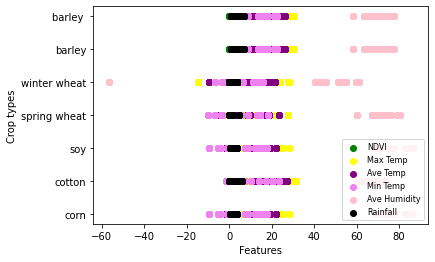

In [11]:
#plot the each feature with output crop
plt.xlabel('Features')
plt.ylabel('Crop types')

# pltX=df.loc[:,'longitude']
# pltY=df.loc[:,'Crop_Type']
# plt.scatter(pltX,pltY, color='blue' ,label='longitude')

# pltX=df.loc[:,'latitude']
# pltY=df.loc[:,'Crop_Type']
# plt.scatter(pltX,pltY, color='red' ,label='latitude')

pltX=df.loc[:,'NDVI']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='green' ,label='NDVI')

pltX=df.loc[:,'Max Temp']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='yellow' ,label='Max Temp')

pltX=df.loc[:,'Ave Temp']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='purple' ,label='Ave Temp')

pltX=df.loc[:,'Min Temp']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='violet' ,label='Min Temp')

pltX=df.loc[:,'Ave Humidity']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='pink' ,label='Ave Humidity')


pltX=df.loc[:,'Rainfall']
pltY=df.loc[:,'Crop_Type']
plt.scatter(pltX,pltY, color='black' ,label='Rainfall')

plt.legend(loc=4,prop={'size':8})
plt.show()

In [25]:
#slipt the data into training data(75%) and test data(25%)
df= df.to_numpy()
#converting the dataset pandas to numpy array ndarray
print("this is dataset after converting the pandas to numpy \n",df)
print("This is data type of our dataset\n",type(df))
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

this is dataset after converting the pandas to numpy 
 [[-8.87075114e+01  4.18154536e+01  2.51800000e-01 ...  8.58882353e+01
   1.67352941e+00  2.00000000e+00]
 [-8.87075114e+01  4.18154536e+01  3.86900000e-01 ...  8.58882353e+01
   1.67352941e+00  2.00000000e+00]
 [-8.87075114e+01  4.18154536e+01  2.60700000e-01 ...  7.77250000e+01
   5.16785714e-01  2.00000000e+00]
 ...
 [-1.11014926e+02  4.73737794e+01  2.48900000e-01 ...  7.55066667e+01
   8.80666667e-01  1.00000000e+00]
 [-1.11014926e+02  4.73737794e+01  2.72800000e-01 ...  7.55774193e+01
   3.58903226e+00  1.00000000e+00]
 [-1.11014926e+02  4.73737794e+01 -2.22000000e-02 ...  7.55774193e+01
   3.58903226e+00  1.00000000e+00]]
This is data type of our dataset
 <class 'numpy.ndarray'>


In [26]:
# standardizing the data
# df=df.std()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [26]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print("values of x_train\n",x_train)
print("values of x_test\n",x_test)

values of x_train
 [[ 1.17749845 -0.06897271 -0.49824875 ... -1.30469272  1.18620072
   0.05046103]
 [ 0.08299127  0.99127694 -0.42971979 ... -0.11226389  0.42513904
   1.84937475]
 [ 0.35026153  0.40807009  1.97052864 ...  0.79876023  0.99450861
  -0.25169028]
 ...
 [ 0.25387867  0.29727006  0.54399862 ...  0.58655582  0.5860747
  -0.85623801]
 [ 0.64768838  0.27269935  0.86322212 ...  0.93240385  0.01313873
   0.58647113]
 [ 0.97379358 -0.52886237 -0.00510049 ... -1.74594492  0.20957662
  -0.91059825]]
values of x_test
 [[-0.91040261 -0.29845394 -0.75197939 ... -0.01218977 -1.06074264
   0.63513027]
 [ 1.00306322 -0.06248233 -0.3841784  ... -1.30469272  1.18620072
   0.05046103]
 [ 1.13965488  0.14289178  2.31967934 ...  1.23219901  1.23531733
  -0.61064444]
 ...
 [ 0.27546133  0.20176878 -0.54509133 ... -0.84330595  0.42578527
   0.25612853]
 [-0.67594982  1.18088871 -1.44681097 ... -1.13726636  0.24538262
  -0.53621845]
 [-0.68600202 -0.67999546 -0.46528545 ... -0.56928095 -1.56751

In [27]:
#standardizing the range
print("values of standardized x_train range\n",x_train.std())
print("values of standardized x_test range\n",x_test.std())

values of standardized x_train range
 1.0000000000000002
values of standardized x_test range
 0.9992778913419128


In [28]:
#train the model
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
#accuracy on traing data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [30]:
print("Accuracy on training data\n",training_data_accuracy)
#check precision,recall,f1 score
print(classification_report(y_train,x_train_prediction))

Accuracy on training data
 0.9994293770540337
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22376
           1       1.00      0.99      1.00     66365
           2       1.00      1.00      1.00    154740
           3       1.00      1.00      1.00    153387
           4       1.00      1.00      1.00    154741
           5       1.00      1.00      1.00    153962
           6       1.00      1.00      1.00    132110

    accuracy                           1.00    837681
   macro avg       1.00      1.00      1.00    837681
weighted avg       1.00      1.00      1.00    837681



In [31]:
#accuracy on test data
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [32]:
print("Accuracy on testing data\n",testing_data_accuracy)
#check precision,recall,f1 score
print(classification_report(y_test,x_test_prediction))

Accuracy on testing data
 0.9046084203589898
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7415
           1       0.99      0.99      0.99     22092
           2       0.75      0.75      0.75     51652
           3       1.00      1.00      1.00     50770
           4       0.75      0.75      0.75     51652
           5       1.00      1.00      1.00     51660
           6       1.00      1.00      1.00     43987

    accuracy                           0.90    279228
   macro avg       0.92      0.92      0.92    279228
weighted avg       0.90      0.90      0.90    279228



In [33]:
#making a predictive system
#first we take input
input_value=(-92.44550029,43.78176676,0.3636,20.5483871,14.83870968,8.774193548,73.49354839,3.498709677)
#this input values is in the form of list so first we convert the list of data into numpy array
#using function "asarray"
updated_input_value=np.asarray(input_value)
# as we know we not take last target value, so we reshape the numpy array
reshaped_input_value=updated_input_value.reshape(1,-1)

# for prediction
prediction=model.predict(reshaped_input_value)
print(prediction)

# take condition if prediction is R then it is Rock other wise Mine
# we take prediction[0] because it is in list form so we take first index 0 that this is equal to R or M
if(prediction[0]==2): 
    print("This is Corn")
elif(prediction[0]==3):
    print("This is Cotton")
elif(prediction[0]==4):
    print("This is Soy")
elif(prediction[0]==5):
    print("This is Spring Wheat")
elif(prediction[0]==6):
    print("This is winter wheat")
else:
    print("This is Barley")
  

[1]
This is Barley


In [34]:
    #test the model
    predictions=model.predict(x_test)
    #check precision,recall,f1 score
    print(classification_report(y_test,predictions))
    # check the accuracy of algorithms
    print("Accuracy of algorithm Decision tree :\n",accuracy_score(y_test,predictions)*100)
    # print(predictions),predictions
    # print(y_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7415
           1       0.99      0.99      0.99     22092
           2       0.75      0.75      0.75     51652
           3       1.00      1.00      1.00     50770
           4       0.75      0.75      0.75     51652
           5       1.00      1.00      1.00     51660
           6       1.00      1.00      1.00     43987

    accuracy                           0.90    279228
   macro avg       0.92      0.92      0.92    279228
weighted avg       0.90      0.90      0.90    279228

Accuracy of algorithm Decision tree :
 90.46084203589898


In [32]:
# check which features more important for the classification
imp_features=model.feature_importances_
columns=X.columns
i=0

while i<len(columns):
    print(f"the importance of features '{columns[i]}' is :  {round(imp_features[i]*100,2)}%")
    i+=1

the importance of features 'longitude' is :  43.99%
the importance of features 'latitude' is :  50.47%
the importance of features 'NDVI' is :  4.45%
the importance of features 'Max Temp' is :  0.22%
the importance of features 'Ave Temp' is :  0.17%
the importance of features 'Min Temp' is :  0.21%
the importance of features 'Ave Humidity' is :  0.3%
the importance of features 'Rainfall' is :  0.19%


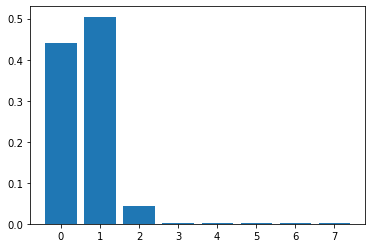

In [33]:
# plot feature importance
plt.bar([x for x in range(len(imp_features))], imp_features)
plt.show()

In [35]:
# filename='trained_model.sav'
filename='trained_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [36]:
#load the save model
# loaded_model=pickle.load(open('trained_model.sav','rb'))
loaded_model=pickle.load(open('trained_model.pkl','rb'))

In [96]:
# #making a predictive system
# #first we take input
# input_value=(-92.44550029,43.78176676,0.3636,20.5483871,14.83870968,8.774193548,73.49354839,3.498709677)
# #this input values is in the form of list so first we convert the list of data into numpy array
# #using function "asarray"
# updated_input_value=np.asarray(input_value)
# # as we know we not take last target value, so we reshape the numpy array
# reshaped_input_value=updated_input_value.reshape(1,-1)

# # for prediction
# prediction=loaded_model.predict(reshaped_input_value)
# print(prediction)

# # take condition if prediction is R then it is Rock other wise Mine
# # we take prediction[0] because it is in list form so we take first index 0 that this is equal to R or M
# if(prediction[0]==2): 
#     print("This is Corn")
# elif(prediction[0]==3):
#     print("This is Cotton")
# elif(prediction[0]==4):
#     print("This is Soy")
# elif(prediction[0]==5):
#     print("This is Spring Wheat")
# elif(prediction[0]==6):
#     print("This is winter wheat")
# else:
#     print("This is Barley")
  

[1]
This is Barley
